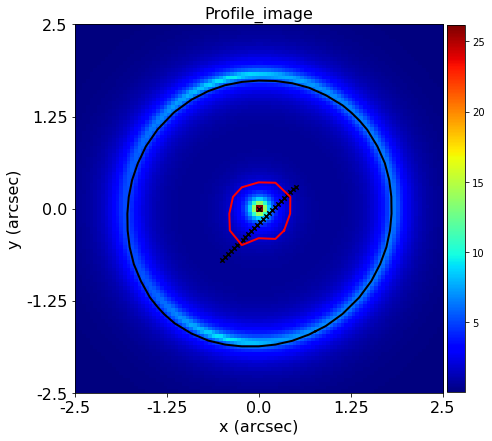

In [34]:
"""
Erik Wallin
Task I for GSoC 2020
"""

%matplotlib inline

import autolens as al
import autolens.plot as aplt

image_plane_grid = al.grid.uniform(
    shape_2d=(100, 100), pixel_scales=0.05, sub_size=2
)

#Following is the definitions for the lensing galaxy, using values from the paper

mass_profiles = []

#Dark matter subhalo
sis_mass_profile = al.mp.SphericalIsothermal(
    centre=(0.0, 0.0), einstein_radius=1.2
)

mass_profiles.append(("mass_1", sis_mass_profile))

"""
Since PyAutolens did not contain a linear mass density, we do a crude but useful approximation.

We model the line from (x_0, y_0) to (x_1, y_1) by a series of N spheres of equal mass, with equal
spacing between them. If the vortex is 0.01 of the subhalo mass, then each sphere is 0.01/N of
the subhalo mass.

To motivate this approximation, we draw the similarities to electrodynamics: Consider approximating
a segment of this mass-string, by two spheres. This is an theoretically identical problem as 
modelling a charged line by its dipole approximation, with two charged spheres. Which models the
potential well far away, relative to the separation distance of the dipole. 

As long as N is high enough, this can be a reasonable approximation, hoping that the local 
disturbances in the deflection doesn't have a too large effect on the whole lensing of the vortex.
"""

#Spheres - 1
N = 25

origin = (-0.7,-0.5)
end = (0.3, 0.5)

individual_einstein_radius = (0.01/N)**0.5 * 1.2

for i in range(0,N+1):
    pos_x = i/N*end[0] + (1-i/N)*origin[0]
    pos_y = i/N*end[1] + (1-i/N)*origin[1]
    
    profile = al.mp.SphericalIsothermal(
    centre=(pos_x, pos_y), einstein_radius=individual_einstein_radius
    )
    
    mass_profiles.append(("mass_" + str(i+2), profile))

#Lens galaxy light profile
sersic_light_profile = al.lp.SphericalSersic(
    centre=(0.0, 0.0), intensity=1.2, effective_radius=0.5, sersic_index=2.5
)

lens_galaxy = al.Galaxy(redshift=0.5, light=sersic_light_profile, **dict(mass_profiles))


#Onto the lensed galaxy definitions
sersic_light_profile = al.lp.SphericalSersic(
    centre=(0.0, 0.0), intensity=0.8, effective_radius=0.5, sersic_index=1.5
)

source_galaxy = al.Galaxy(redshift=1.0, light=sersic_light_profile)

#Then they are simply raytraced
tracer = al.Tracer.from_galaxies(
    galaxies=[lens_galaxy, source_galaxy],
)

traced_profile_image = tracer.profile_image_from_grid(grid=image_plane_grid)

aplt.tracer.profile_image(tracer=tracer, grid=image_plane_grid)